400
90


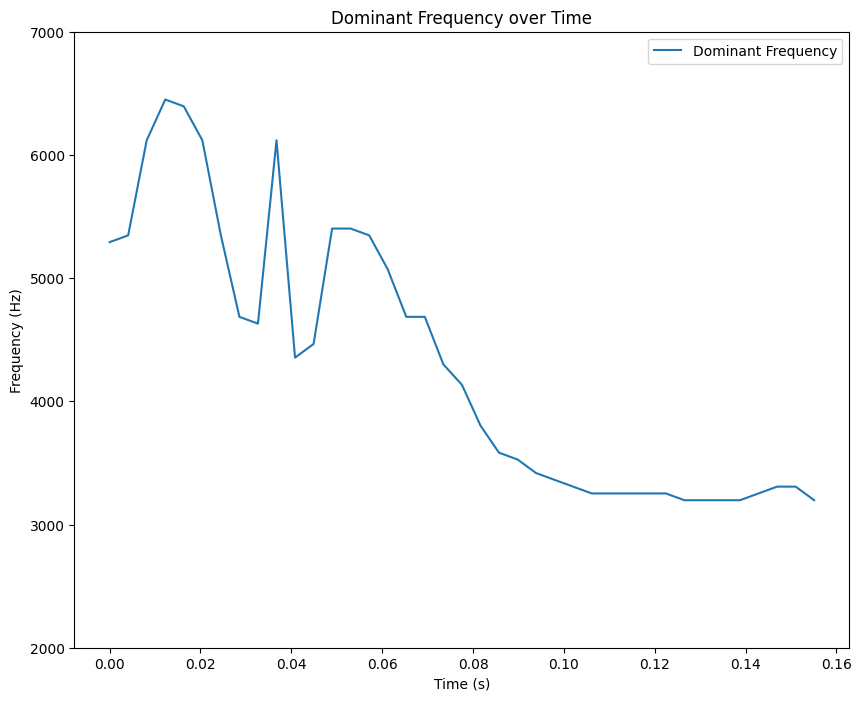

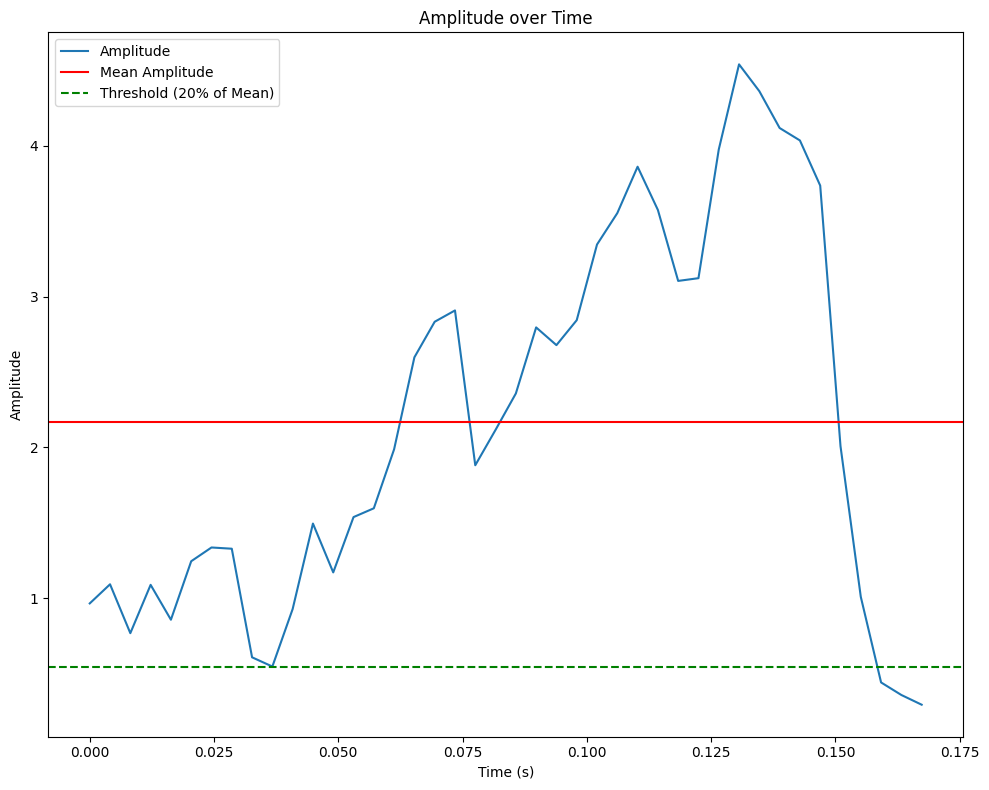

In [89]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

def track_dominant_frequencies(audio_path, window_length_sec=0.01, freq_min=2000, freq_max=7000):
    y, sr = librosa.load(audio_path)
    window_size = 400 #int(window_length_sec * sr)
    print(window_size)
    hop_length = 90 #window_size // 2
    print(hop_length)
    
    S = librosa.stft(y, n_fft=window_size, hop_length=hop_length)
    S_magnitude, _ = librosa.magphase(S)
    freqs = librosa.fft_frequencies(sr=sr, n_fft=window_size)
    
    dominant_frequencies = []
    dominant_amplitudes = []

    for i in range(S_magnitude.shape[1]):
        if freq_min is not None and freq_max is not None:
            valid_indices = (freqs >= freq_min) & (freqs <= freq_max)
            magnitude_slice = S_magnitude[valid_indices, i]
            freqs_slice = freqs[valid_indices]
        else:
            magnitude_slice = S_magnitude[:, i]
            freqs_slice = freqs
        
        dominant_index = np.argmax(magnitude_slice)
        dominant_frequency = freqs_slice[dominant_index]
        dominant_amplitude = magnitude_slice[dominant_index]

        dominant_frequencies.append(dominant_frequency)
        dominant_amplitudes.append(dominant_amplitude)
    
    # Calculate the mean amplitude
    mean_amplitude = np.mean(dominant_amplitudes)
    threshold_amplitude = 0.25 * mean_amplitude
    
    # Replace dominant frequencies with nan where amplitude is below 20% of the mean amplitude
    dominant_frequencies = [freq if amp >= threshold_amplitude else np.nan for freq, amp in zip(dominant_frequencies, dominant_amplitudes)]
    
    times = librosa.frames_to_time(np.arange(len(dominant_frequencies)), sr=sr, hop_length=hop_length)
    
    # Plot dominant frequency over time
    plt.figure(figsize=(10, 8))
    plt.plot(times, dominant_frequencies, label='Dominant Frequency')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.ylim(freq_min, freq_max)
    plt.title('Dominant Frequency over Time')
    plt.legend()
    
    # Plot amplitude over time with mean and threshold lines
    plt.figure(figsize=(10, 8))
    plt.plot(times, dominant_amplitudes, label='Amplitude')
    plt.axhline(y=mean_amplitude, color='r', linestyle='-', label='Mean Amplitude')
    plt.axhline(y=threshold_amplitude, color='g', linestyle='--', label='Threshold (20% of Mean)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Amplitude over Time')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

audio_path = '/Users/quentinbacquele/Desktop/Internship/Berkeley/Reunion Gray white-eye/01_Analysed 2/segments/S5_ZB_0036_211110_009.WAV_14.wav'
track_dominant_frequencies(audio_path)


400
90
[nan, 5677.875, 5567.625, 5512.5, 4520.25, 4465.125, 4465.125, 4575.375, 4575.375, 4795.875, 4851.0, 4851.0, 4851.0, 4906.125, 4961.25, 5016.375, 5016.375, 4961.25, 4961.25, 4961.25, 4906.125, 4906.125, 4851.0, 4795.875, 4795.875, 4740.75, 4685.625, 4630.5, 4575.375, 4575.375, 4354.875, 4134.375, 3858.75, 3693.375, 3638.25, 3638.25, 4189.5, 4299.75, 4520.25, 4575.375, 4685.625, 4685.625, 4575.375, 4520.25, 4465.125, 4354.875, 4244.625, 4189.5, 4079.25, 3858.75, nan]


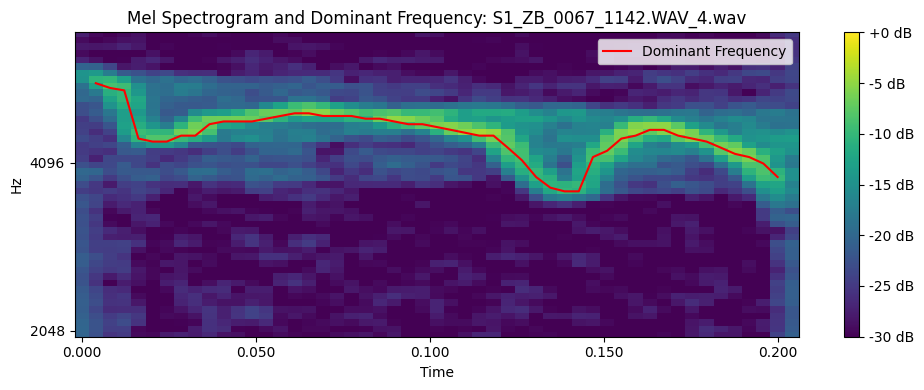

400
90
[nan, 4906.125, 4906.125, 4465.125, 4244.625, 3913.875, 3913.875, 3969.0, 4410.0, 4410.0, 4354.875, 4079.25, 3913.875, 3913.875, 3858.75, 3858.75, 3858.75, 3858.75, 3858.75, 3913.875, 3969.0, 4134.375, 4189.5, 4299.75, 4354.875, 4299.75, 4244.625, 4079.25, 3748.5, 3583.125, 3583.125, 3858.75, 3858.75, 3858.75, 3748.5, 3638.25, 3583.125, 3528.0, 3472.875, 3417.75, 3417.75, 3362.625, 3362.625, 3362.625, 3362.625, 3362.625, 3362.625, 3362.625, 3362.625, nan, nan, nan, nan, nan, nan]


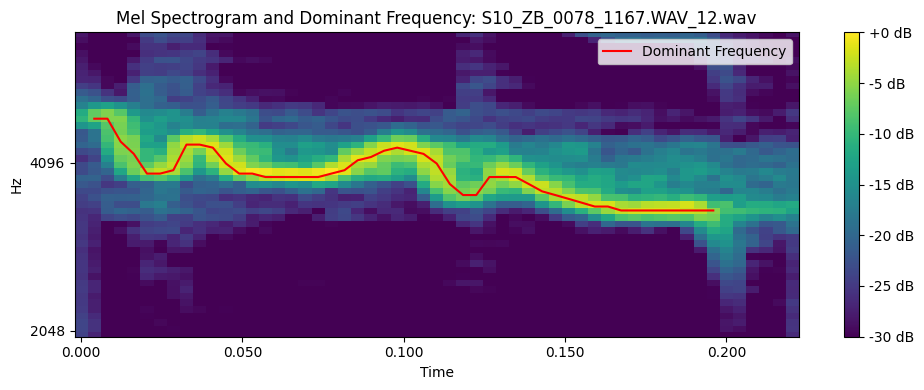

400
90
[nan, 5733.0, 5071.5, 5071.5, 5071.5, 5347.125, 5347.125, 4740.75, 4685.625, 4575.375, 4520.25, 4465.125, 4410.0, 4410.0, 4354.875, 4299.75, 4189.5, 3969.0, 3858.75, 3858.75, 3858.75, 3858.75, 4244.625, 4299.75, 4354.875, 4410.0, 4354.875, 4354.875, 4354.875, 4299.75, 4244.625, 4134.375, 4134.375, 3969.0, 3969.0, nan, nan]


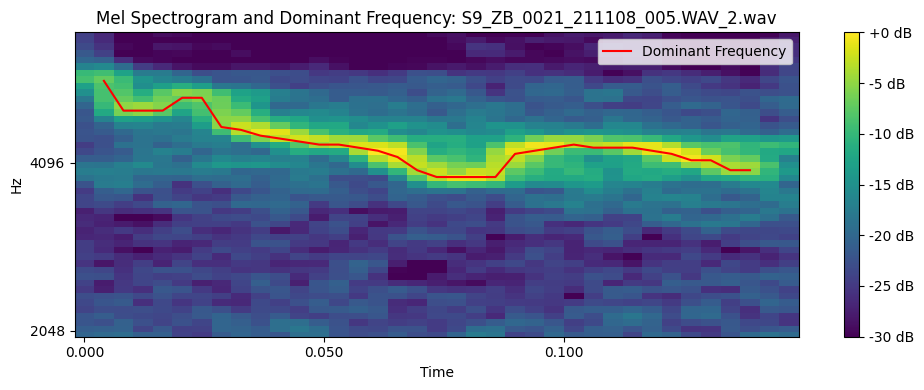

400
90
[nan, 4134.375, 4134.375, 4024.125, 4024.125, 4079.25, 4134.375, 4299.75, 4520.25, 4520.25, 4079.25, 4079.25, 3858.75, 3803.625, 3803.625, 3969.0, 4024.125, 4079.25, 4079.25, 4079.25, 4079.25, 3913.875, 3803.625, 3693.375, 3693.375, 3693.375, 3528.0, 3528.0, 3693.375, 3969.0, 3969.0, 3913.875, 3858.75, 3858.75, 3858.75, 3858.75, 3858.75, 3858.75, 3638.25, 3528.0, 3528.0, 3583.125, nan]


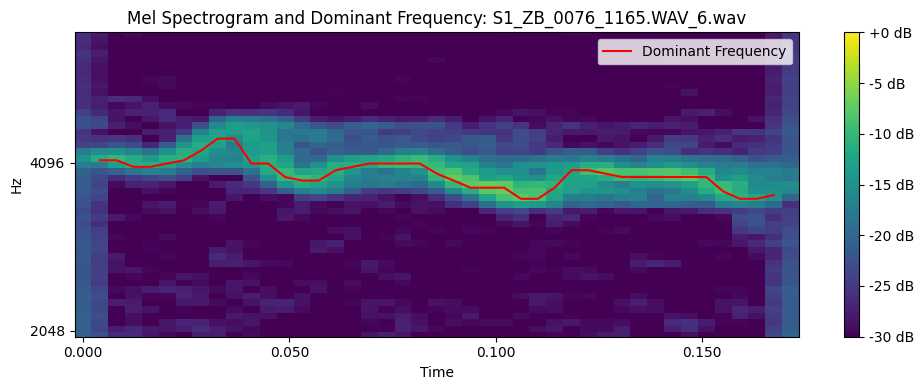

400
90
[5292.0, 5292.0, 4685.625, 4520.25, 4520.25, 4465.125, 4465.125, 4465.125, 4410.0, 4410.0, 4354.875, 4354.875, 4244.625, 4244.625, 4189.5, 4244.625, 4299.75, 4299.75, 4189.5, 4134.375, 4244.625, 4244.625, 4244.625, 3693.375, 3693.375, 3638.25, 3638.25, 3583.125, 3472.875, 3417.75, 3362.625, 3307.5, 3252.375, 3252.375, 3252.375, 3252.375, 3362.625, 3362.625, 3528.0, 3528.0, 3528.0, 3417.75, 3417.75]


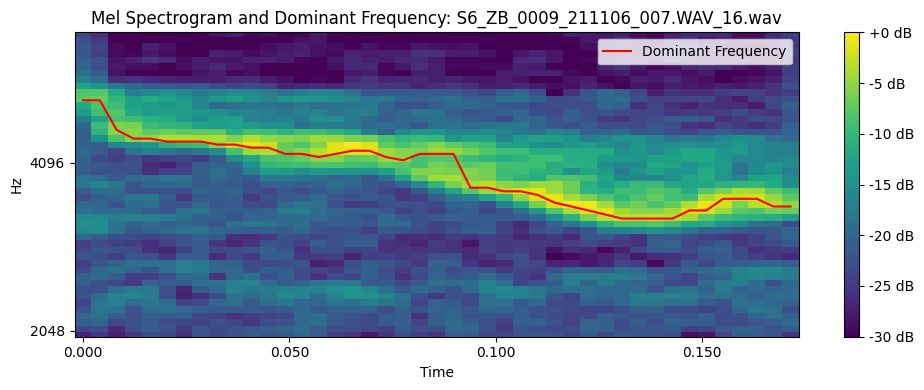

400
90
[5126.625, 5071.5, 5071.5, 5071.5, 4630.5, 4024.125, 3913.875, 3693.375, 3693.375, 3913.875, 3969.0, 4079.25, 4685.625, 4740.75, 4740.75, 4685.625, 4630.5, 4520.25, 4299.75, 4024.125, 3969.0, 3913.875, 3693.375, 3528.0, 3472.875, 3472.875, 3472.875, 3472.875, nan]


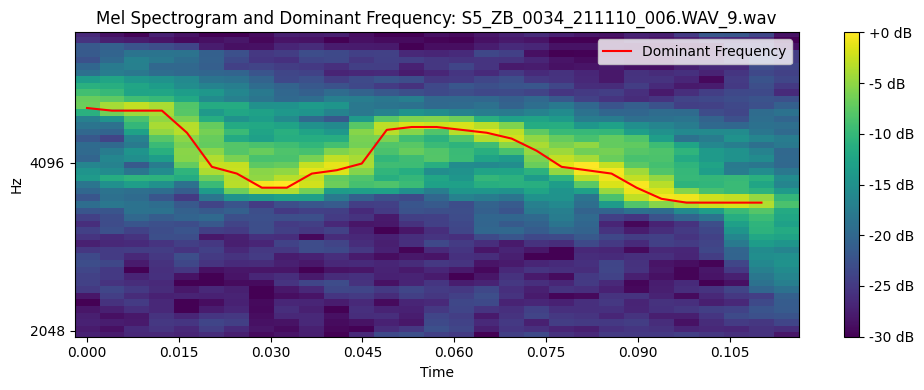

400
90
[4851.0, 4685.625, 4685.625, 4354.875, 4134.375, 3969.0, 3913.875, 3858.75, 3693.375, 3693.375, 3693.375, 3693.375, 3803.625, 3913.875, 4024.125, 4354.875, 4520.25, 4354.875, 4134.375, 4134.375, 4024.125, 4024.125, 4024.125, 3969.0, 3969.0, 3969.0, 3969.0, nan, nan]


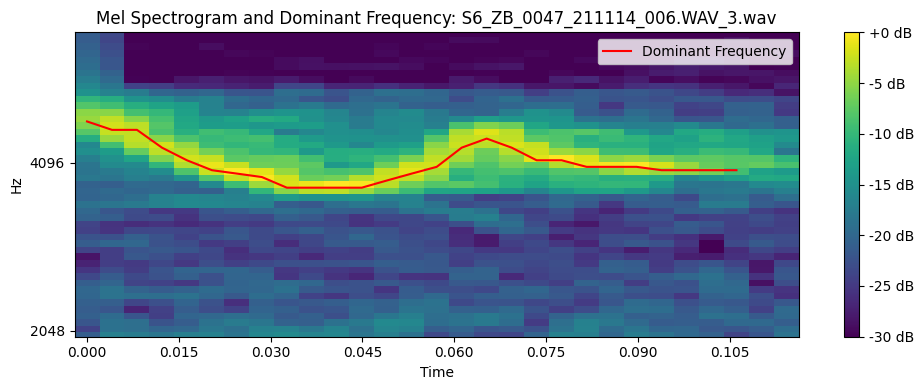

400
90
[nan, nan, 4630.5, 4465.125, 4465.125, 4630.5, 4630.5, 4906.125, 4961.25, 5016.375, 5016.375, 4906.125, 4851.0, 4795.875, 4630.5, 4630.5, 4410.0, 4299.75, 4244.625, 4244.625, 4244.625, 4244.625, 4465.125, 4465.125, 4575.375, 4465.125, 4410.0, 4410.0, 4299.75, 4244.625, 4189.5, 4134.375, 3913.875, 3858.75, 3748.5, 3693.375]


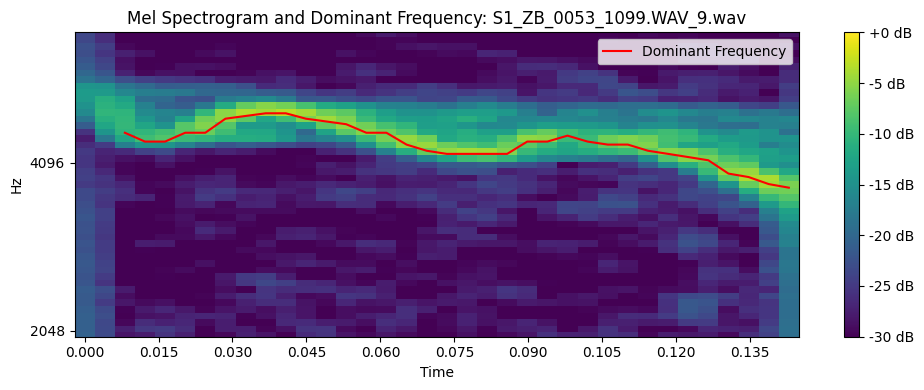

400
90
[nan, 4961.25, 5016.375, 5071.5, 5071.5, 4961.25, 4906.125, 4740.75, 4465.125, 4354.875, 4244.625, 4134.375, 4024.125, 3969.0, 3748.5, 3528.0, 3472.875, 3362.625, 3197.25, 3142.125, 3087.0, 3031.875, 2976.75, 2976.75, 3197.25, 3252.375, 3307.5, 3693.375, 3803.625, 4299.75, 4520.25, 4575.375, 4520.25, 4465.125, 4410.0, 4299.75, 3858.75, 3803.625, 3748.5, 3748.5, 3748.5, 3748.5, 3748.5, 3748.5, 3693.375, 3693.375, 3583.125, nan]


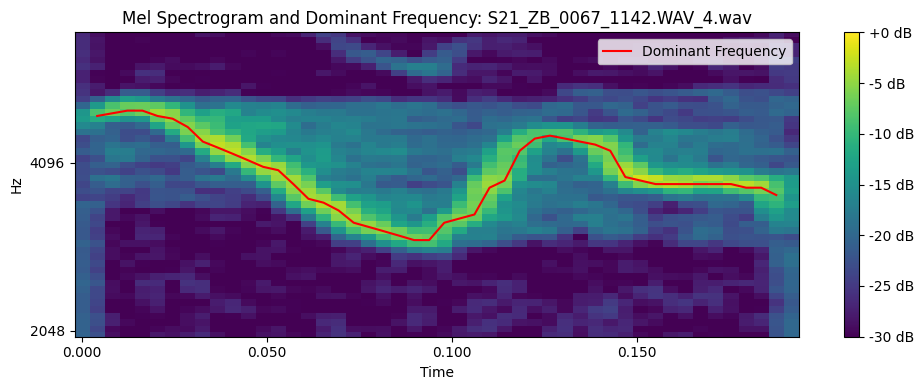

400
90
[nan, 3472.875, 3693.375, 3693.375, 3693.375, 3748.5, 3969.0, 4024.125, 4079.25, 4134.375, 4189.5, 4244.625, 4299.75, 4354.875, 4410.0, 4465.125, 4685.625, 4465.125, 4410.0, 4410.0, 4410.0, 4410.0, 4354.875, 4299.75, 4244.625, 4134.375, 4079.25, 4024.125, 3803.625, 3362.625, 3362.625, 3362.625, 3417.75, 3417.75, 3417.75, 3417.75, 3362.625, nan, nan]


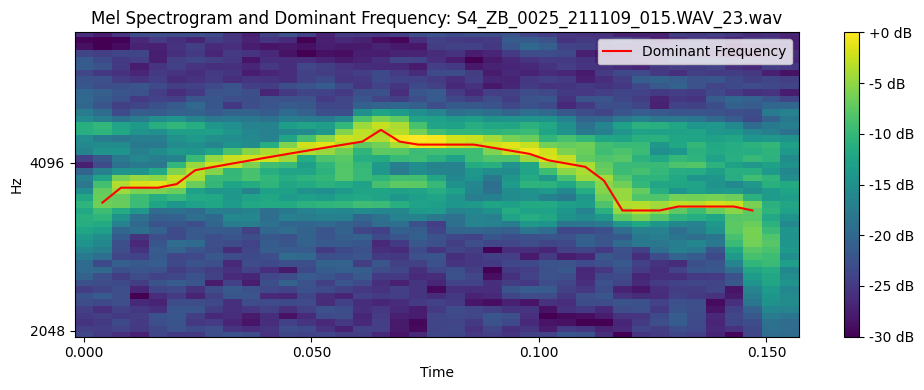

400
90
[nan, 3583.125, 3638.25, 3748.5, 3803.625, 3803.625, 3858.75, 4024.125, 4079.25, 4079.25, 4079.25, 4134.375, 4079.25, 4134.375, 4134.375, 3969.0, 3969.0, 3803.625, 3803.625, 3858.75, 3638.25, 3583.125, 3528.0, 3472.875, 3417.75, 3417.75, 3417.75, 3417.75, 3417.75, 3417.75, 3362.625, 3362.625, 3417.75, 3417.75]


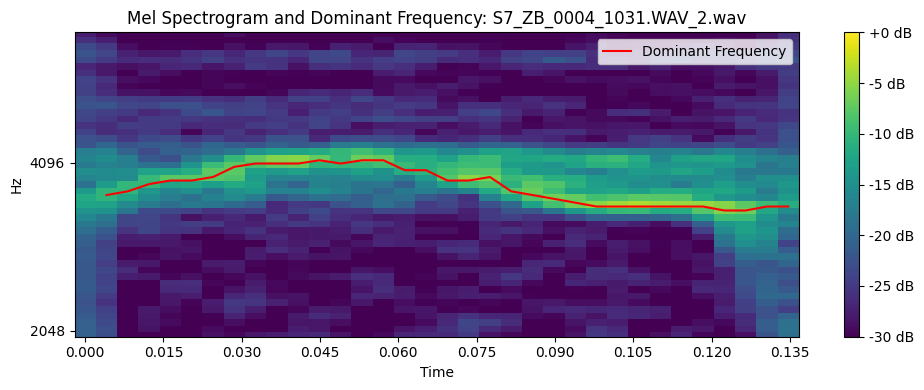

400
90
[nan, 4851.0, 4906.125, 4961.25, 4961.25, 4630.5, 4575.375, 4575.375, 4630.5, 4465.125, 4465.125, 4299.75, 4079.25, 3969.0, 3913.875, 3748.5, 3693.375, 3638.25, 3693.375, 3693.375, 3748.5, 3803.625, 3803.625, 3858.75, 3913.875, 3913.875, 3969.0, 3913.875, 3913.875, 3803.625, 3693.375, nan, nan, nan, 3913.875, 4244.625, 4465.125, 4410.0, 4079.25, 4079.25, 4189.5, 4189.5, 4134.375, 4244.625, 4299.75, 4299.75, 4299.75, 4575.375, 4740.75, 4740.75, nan]


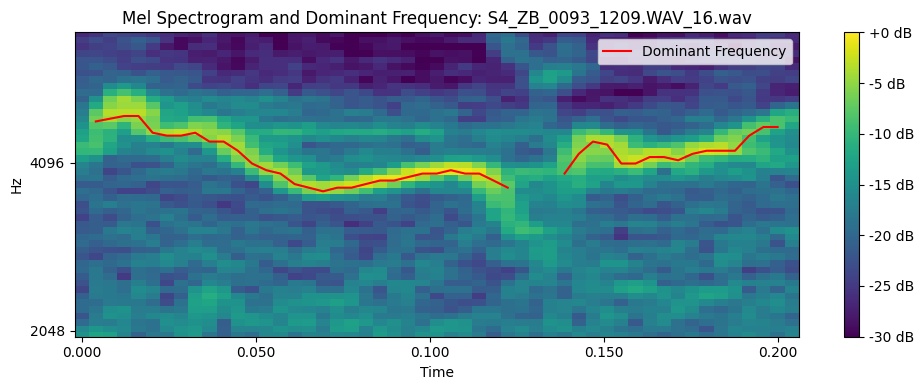

400
90
[nan, 4740.75, 4465.125, 4134.375, 4134.375, 4134.375, 4410.0, 4410.0, 4906.125, 4906.125, 4906.125, 4795.875, 4685.625, 4520.25, 4465.125, 4410.0, 4079.25, 3969.0, 3969.0, 3803.625, 3803.625, 3748.5, 3693.375, 3693.375, 3693.375, 3693.375, 3748.5, 3858.75, 3858.75, 3969.0, 3969.0, 4024.125, 4079.25, 4134.375, 4134.375, 4079.25, 4299.75, 4354.875, 4410.0, 4410.0, 4465.125, 4520.25, 4520.25, 4520.25, 4685.625, nan, nan]


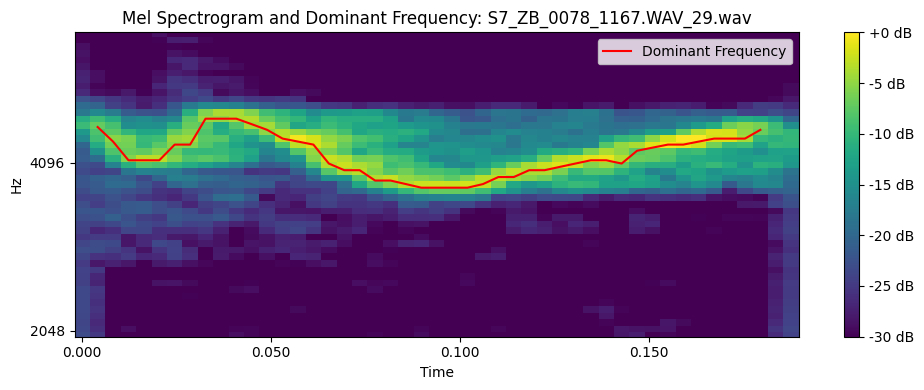

400
90
[nan, 3583.125, nan, nan, 3528.0, 3307.5, 3583.125, 3693.375, 3748.5, 3803.625, 3748.5, 3748.5, 3748.5, 3417.75, 3362.625, 3307.5, 3252.375, 3252.375, 3252.375, 3252.375, 3307.5, 3307.5, 3362.625, 3362.625, 3362.625, 3362.625, 3417.75, 3417.75, 3417.75, 3472.875, 3362.625, 3362.625, 3362.625, 3307.5, 3307.5, 3252.375, 3087.0, nan, nan, nan, nan, nan, 3417.75, 3748.5, 3748.5, 3748.5, 3528.0, 3472.875, nan]


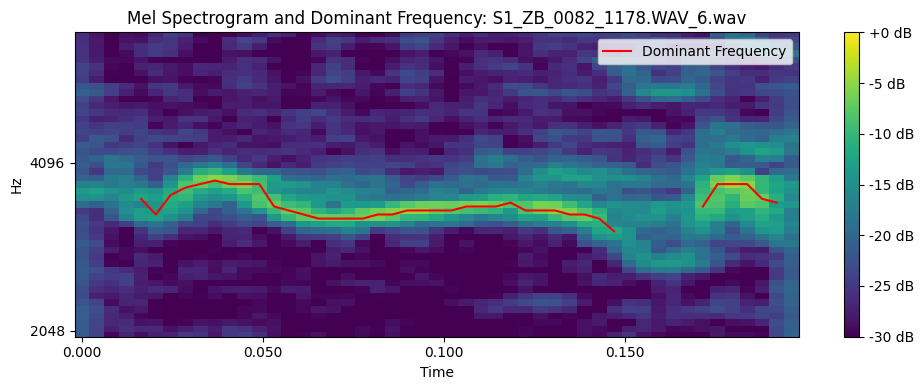

400
90
[nan, 5733.0, 5677.875, 5622.75, 5292.0, 5236.875, 5181.75, 4299.75, 4244.625, 4189.5, 3969.0, 3858.75, 3748.5, 3693.375, 3638.25, 3583.125, 3583.125, 3583.125, 3693.375, 4079.25, 4299.75, 4354.875, 4520.25, 4520.25, 4520.25, 4244.625, 3913.875, 3693.375, 3583.125, 3307.5, 3307.5, 3307.5, 3362.625, 3417.75, 3472.875, 3528.0, 3583.125, 3638.25, 3693.375, 3803.625, 3858.75, 3858.75, 3913.875]


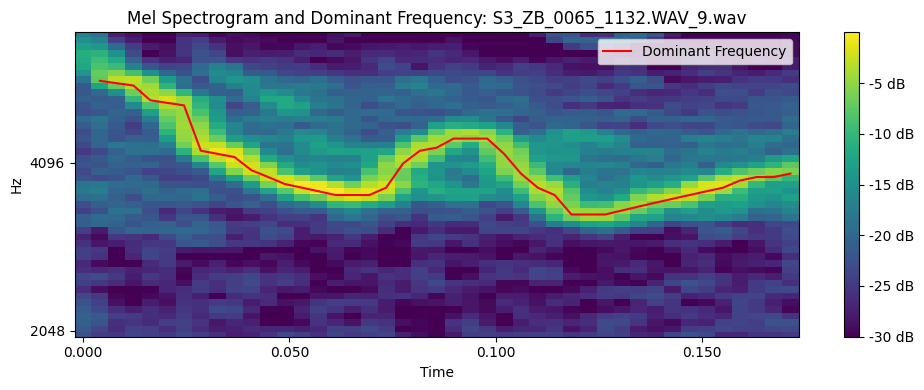

400
90
[4630.5, 4630.5, 4189.5, 3803.625, 3748.5, 3693.375, 3528.0, 3417.75, 3307.5, 3087.0, 3031.875, 3031.875, 3031.875, 3197.25, 3252.375, 3307.5, 3362.625, 3472.875, 3528.0, 3528.0, 3472.875, 3417.75, 3417.75, 3362.625, 3307.5, 3252.375, 3142.125, 3087.0, 3031.875, 3031.875, 3031.875, 2976.75, 2976.75, 2976.75, 2976.75, 2921.625, 2866.5]


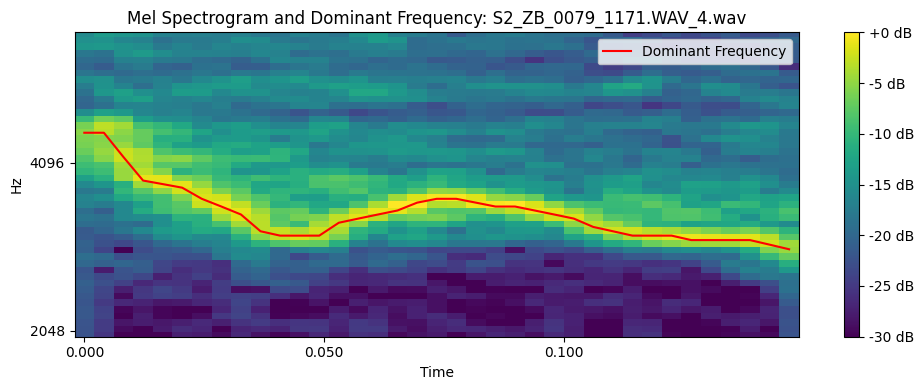

400
90
[nan, 5677.875, 5677.875, nan, 4740.75, 4410.0, 4354.875, 4354.875, 4410.0, 5071.5, 4906.125, 4795.875, 4685.625, 4299.75, 4244.625, 4189.5, 4189.5, 3969.0, 3969.0, 4024.125, 4079.25, 4134.375, 4189.5, 4189.5, 4244.625, 4299.75, 4354.875, 4354.875, 4354.875, 4189.5, 4134.375, 4134.375, 3969.0, 3913.875, 3858.75, 3803.625, 3803.625, 3803.625, 3748.5, 3748.5, 3748.5, 3748.5, 3748.5, 3748.5, 3748.5, 3748.5, 3748.5, 3748.5, 3748.5, 3748.5]


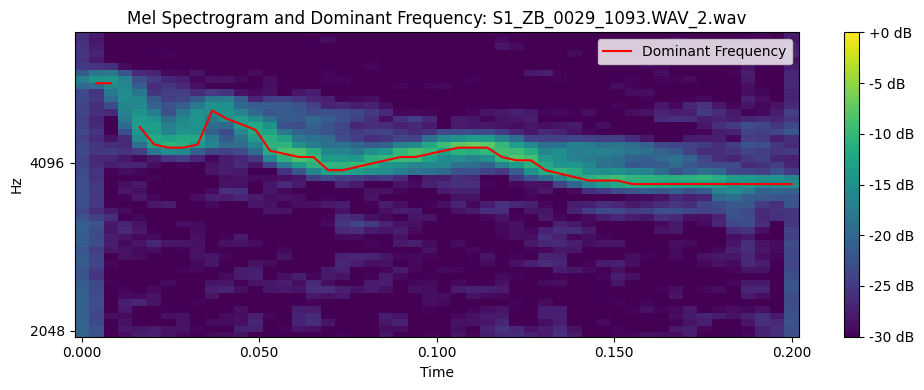

400
90
[nan, nan, 4189.5, 4134.375, 4134.375, 4134.375, 4134.375, 4079.25, 4079.25, 4024.125, 3969.0, 3913.875, 3858.75, 3803.625, 3748.5, 3748.5, 3693.375, 3638.25, 3638.25, 3472.875, 3472.875, 3252.375, 3307.5, 3528.0, 3528.0, 3528.0, 3472.875, 3472.875, 3472.875, 3417.75, 3417.75, 3362.625, 3307.5, 3307.5, 3362.625, nan]


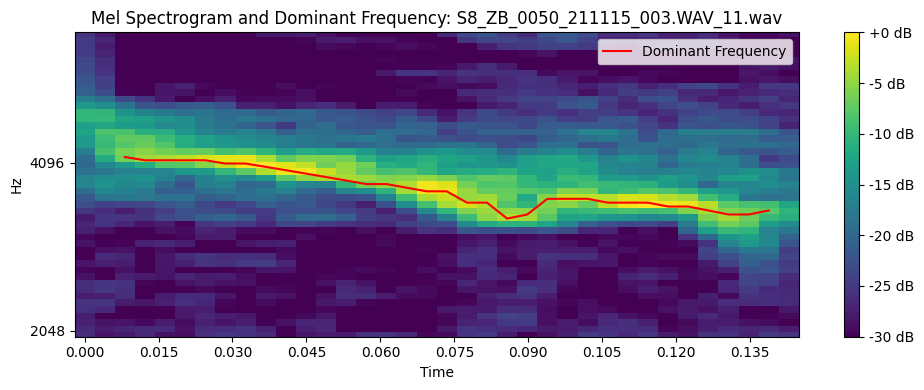

400
90
[5567.625, 5457.375, 4906.125, 4740.75, 4685.625, 4685.625, 4961.25, 4961.25, 4906.125, 4465.125, 4410.0, 4079.25, 4079.25, 4024.125, 3969.0, 3913.875, 3858.75, 3858.75, 3858.75, 3858.75, 3858.75, 3858.75, 3858.75, 3858.75, 3913.875, 3913.875, 3969.0, 4024.125, 4079.25, 4410.0, 4410.0, 4740.75, 4795.875, 4795.875, 4740.75, 4520.25, 4465.125, 3693.375, 3638.25, 3528.0, 3417.75, 3417.75, 3417.75, 3417.75, 3472.875, 3583.125, 3583.125, 3638.25, 3417.75, nan]


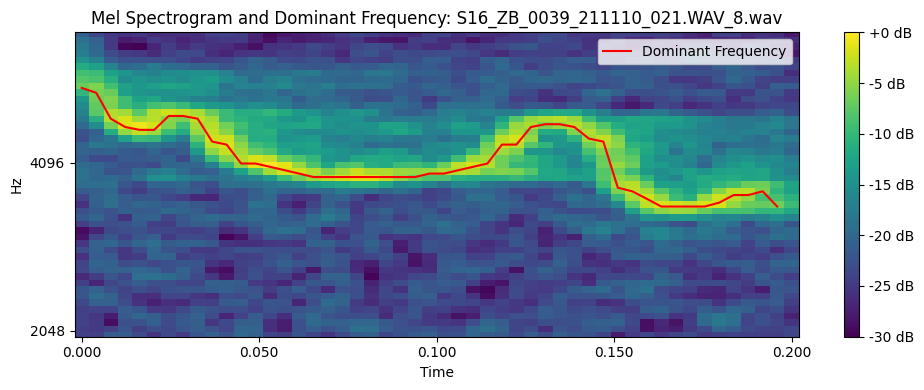

400
90
[5016.375, 4961.25, 4851.0, 4851.0, 4851.0, 4520.25, 4244.625, 4189.5, 4134.375, 4134.375, 4079.25, 4079.25, 4079.25, 4189.5, 4189.5, 4520.25, 4520.25, 4244.625, 4189.5, 4134.375, 4134.375, 4079.25, 4079.25, 4079.25, 4189.5, 4189.5, 4244.625, 4354.875, 4520.25, 4851.0, 4906.125, 5016.375, 5457.375, 5457.375, 5457.375, 5457.375, 5457.375, 5457.375, 5457.375, 5512.5, nan]


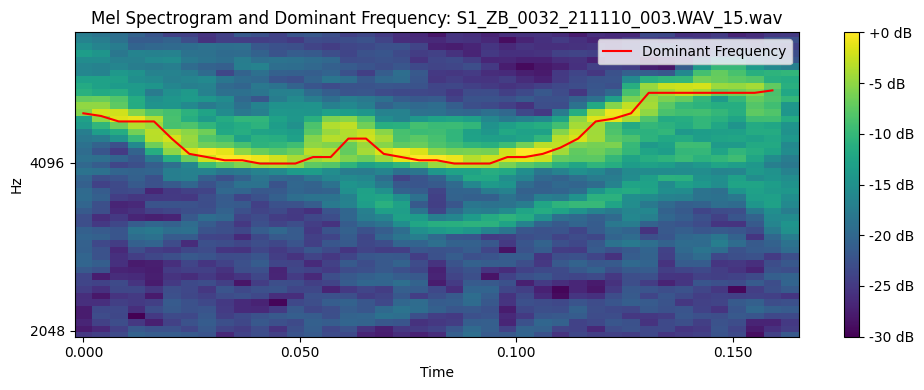

400
90
[6008.625, 6008.625, 5677.875, 5457.375, 5402.25, 5347.125, 5126.625, 5071.5, 4851.0, 4795.875, 4740.75, 4685.625, 4685.625, 4465.125, 4410.0, 4410.0, 4134.375, 4024.125, 4024.125, 3969.0, 3969.0, 3913.875, 3913.875, 3913.875, 3858.75, 3858.75, 3858.75, 3858.75, 3913.875, 3913.875, 3913.875]


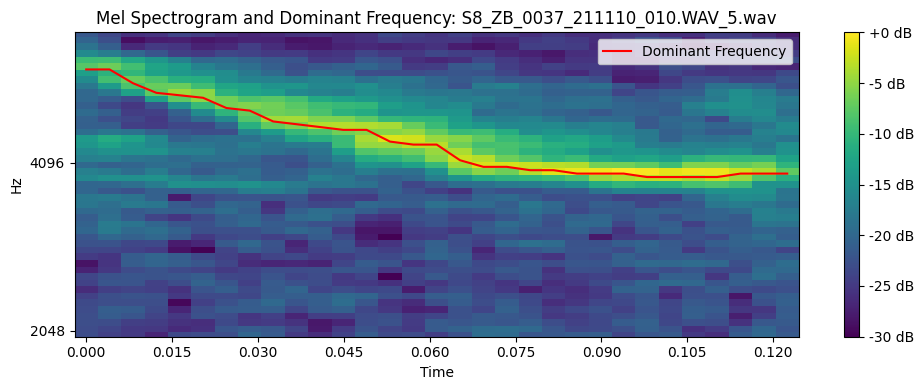

400
90
[4244.625, 4244.625, 4354.875, 4410.0, 4410.0, 4410.0, 4354.875, 4134.375, 4079.25, 4079.25, 4079.25, 4134.375, 4189.5, 4244.625, 4299.75, 4299.75, 4244.625, 4189.5, 4189.5, 4189.5, 4079.25, 3913.875, 3913.875, 3913.875, 3913.875, 4024.125, 4079.25]


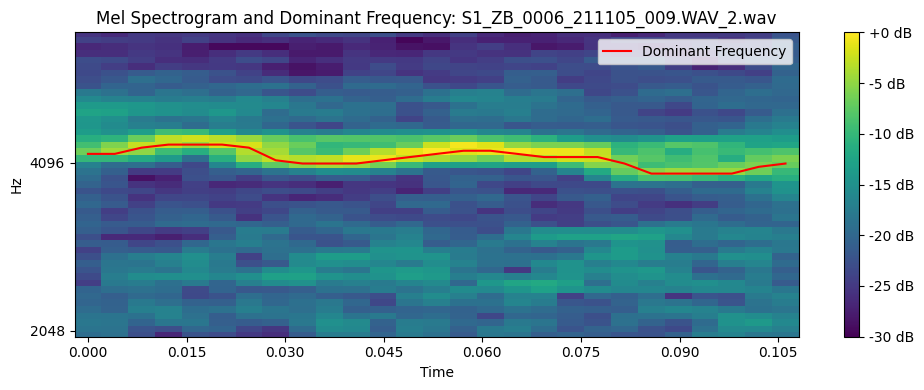

400
90
[nan, nan, nan, nan, 3417.75, 3362.625, 3362.625, 3307.5, 3252.375, 3252.375, 3252.375, 3197.25, 3252.375, 3252.375, 3307.5, 3417.75, 3638.25, 4024.125, 4189.5, 4244.625, 4244.625, 4244.625, 4244.625, 4189.5, 4189.5, 4134.375, 4079.25, 4079.25, 4024.125, 3969.0, 3969.0, 3913.875, 3913.875, 3858.75, 3803.625, 3803.625, 3803.625, 3748.5, 3693.375, 3638.25, nan]


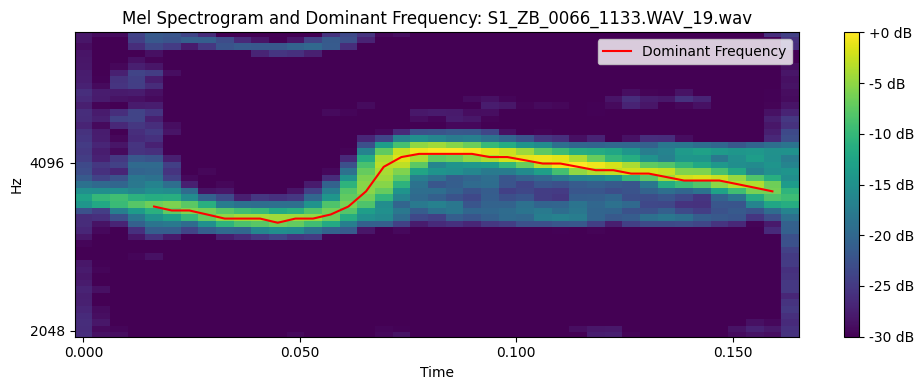

400
90
[nan, nan, 4079.25, 4079.25, 3638.25, 3638.25, 3583.125, 3638.25, 3638.25, 3638.25, 3693.375, 3693.375, 3693.375, 3748.5, 3748.5, 3969.0, 4024.125, 3969.0, 3858.75, 3803.625, 3748.5, 3693.375, 3638.25, 3583.125, 3472.875, 3417.75, 3362.625, 3252.375, 3252.375, 3197.25, 3197.25, 3197.25, 3197.25, 3197.25, 3252.375, 3252.375, 3252.375, 3197.25, nan, nan, nan]


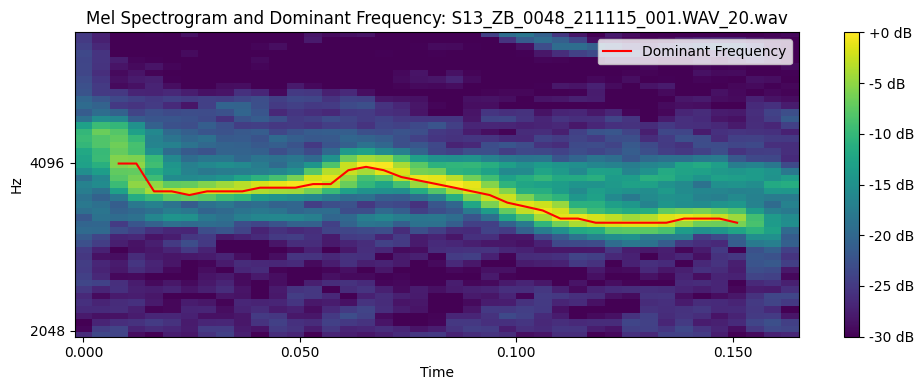

400
90
[nan, 3417.75, 3362.625, 3417.75, 3472.875, 3528.0, 3583.125, 3638.25, 3693.375, 3693.375, 3638.25, 3638.25, 3583.125, 3583.125, 3417.75, 3417.75, 3197.25, 3197.25, 3252.375, 3417.75, 3583.125, 3638.25, 3748.5, 3803.625, 3858.75, 3858.75, 3858.75, 3803.625, 3748.5, 3583.125, 3583.125, 3307.5, 3307.5, 3307.5, 3307.5, 3307.5, 3307.5, 3307.5, 3307.5, 3307.5, 3362.625]


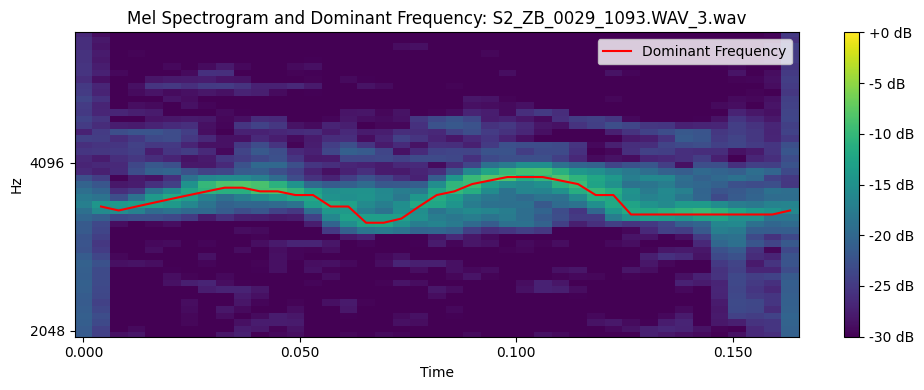

400
90
[4520.25, 4520.25, 4024.125, 3803.625, 3803.625, 3748.5, 3528.0, 3528.0, 3362.625, 3031.875, 2976.75, 2976.75, 3031.875, 3197.25, 3252.375, 3307.5, 3362.625, 3472.875, 3472.875, 3472.875, 3472.875, 3417.75, 3362.625, 3362.625, 3307.5, 3197.25, 3142.125, 3087.0, 3031.875, 2976.75, 2976.75, 2976.75, 2976.75, 2976.75, 2921.625, 2921.625, 2921.625]


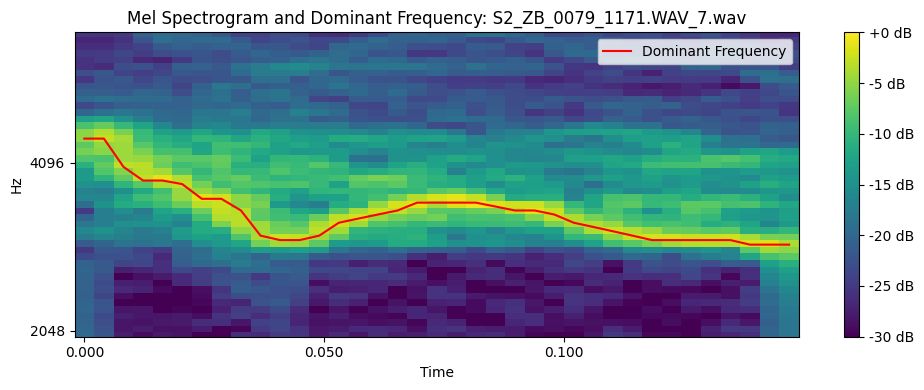

400
90
[4575.375, 4575.375, 4354.875, 4244.625, 4079.25, 4024.125, 4024.125, 3969.0, 3913.875, 3913.875, 3858.75, 3858.75, 3858.75, 3858.75, 3803.625, 3638.25, 3583.125, 3528.0, 3472.875, 3362.625, 3362.625, nan]


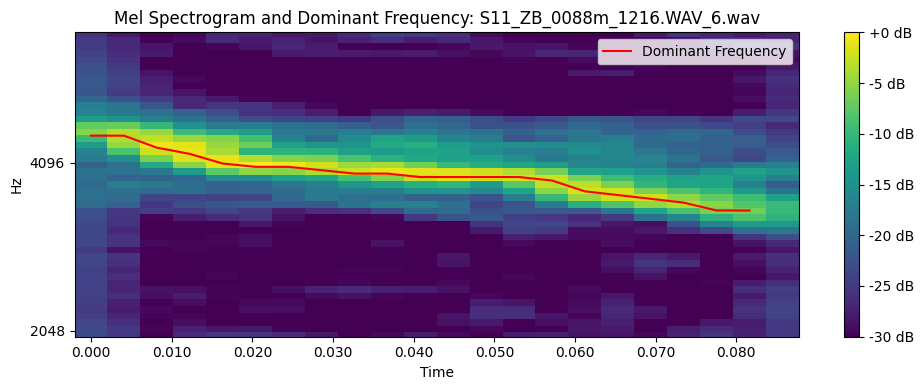

400
90
[5126.625, 5126.625, 5126.625, 5126.625, 4575.375, 4520.25, 4520.25, 4575.375, 4851.0, 4906.125, 4906.125, 4851.0, 4795.875, 4410.0, 4244.625, 4134.375, 4079.25, 3969.0, 3913.875, 3803.625, 3638.25, 3472.875, 3417.75, 3307.5, 3252.375, 3252.375, 3307.5, 3417.75, 3472.875, 3583.125, 3638.25, 3638.25]


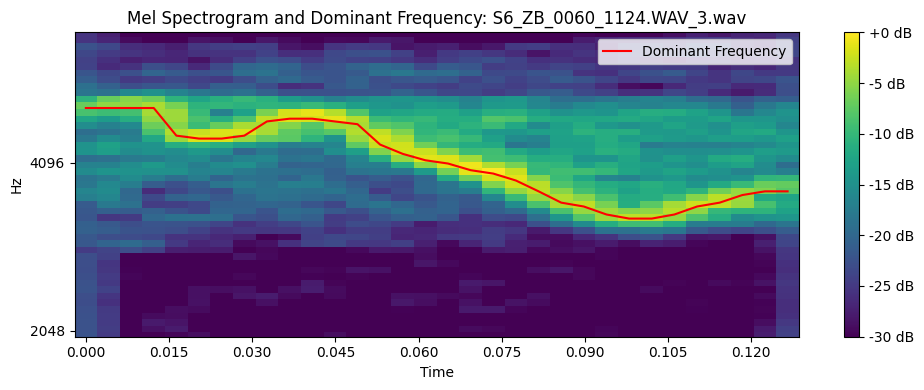

400
90
[5402.25, 5402.25, 5236.875, 4851.0, 4299.75, 4189.5, 4189.5, 3693.375, 3638.25, 3583.125, 3417.75, 3252.375, 3197.25, 3031.875, 2976.75, 2976.75, 2976.75, 2976.75, 2976.75, 2976.75, 2976.75, 2976.75, 3307.5, 3362.625, 3417.75, 3472.875, 3472.875, 3417.75, 3417.75, 3583.125, 3748.5, 3693.375, 3638.25, 3583.125, 3528.0, 3583.125, 3638.25, 3583.125, 3748.5, 3693.375, 3583.125, 3638.25, nan, nan, nan, nan]


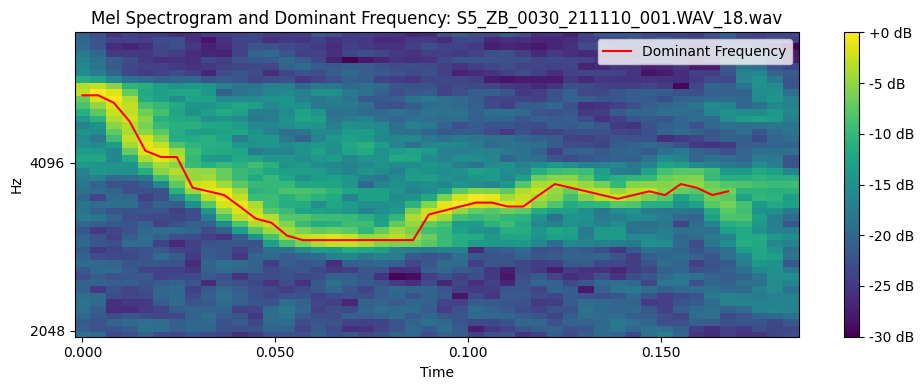

400
90
[5347.125, 5292.0, 5292.0, 5347.125, nan, 4189.5, 4354.875, 4630.5, 4465.125, 4410.0, 4299.75, 4189.5, 4189.5, 4354.875, 4795.875, 4795.875, 4299.75, 4189.5, 4189.5, 4189.5, 4189.5, 4189.5, 4299.75, 4354.875, 4410.0, 4465.125, 4465.125, 4410.0, 4134.375, 4189.5, 4189.5, nan]


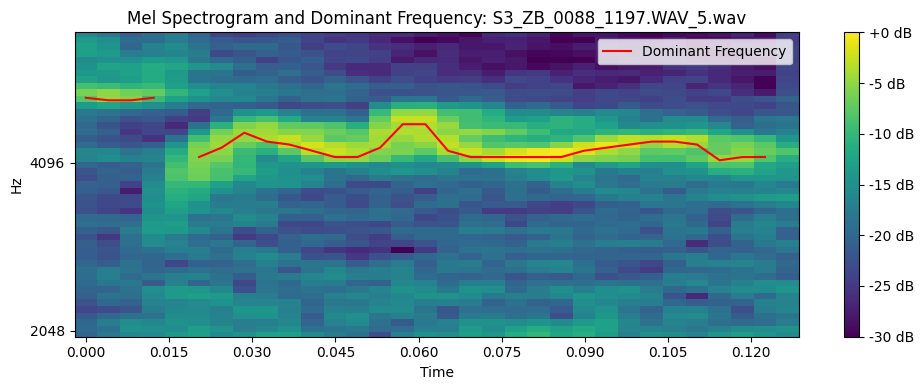

400
90
[3638.25, 3583.125, 3583.125, 3638.25, 3693.375, 3858.75, 3969.0, 3969.0, 3748.5, 3693.375, 3748.5, 3748.5, 3803.625, 3858.75, 3913.875, 3913.875, 3913.875, 3472.875, 3362.625, 3307.5, 3252.375, 3252.375, 3307.5, 3307.5, 3362.625, 3417.75, 3528.0, 3583.125, 3638.25, 3693.375, 3693.375, 3693.375, 3693.375]


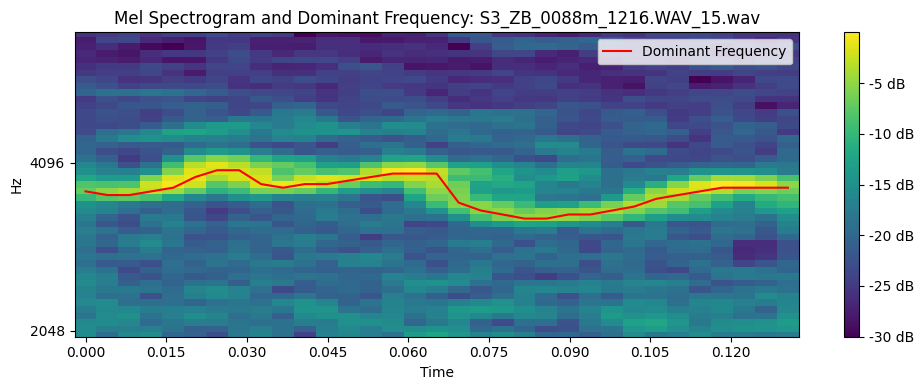

400
90
[5016.375, 4851.0, 4795.875, 4740.75, 4740.75, 4630.5, 4079.25, 3969.0, 3913.875, 3913.875, 3969.0, 3969.0, 3969.0, 3748.5, 3693.375, 3472.875, nan, nan, nan, nan, nan, nan, 3417.75, 3472.875, 3583.125, 3638.25, 3748.5, 3969.0, 4134.375, 4189.5, 4244.625, 4244.625, 4189.5, 4189.5, 4134.375, 3858.75, 3748.5]


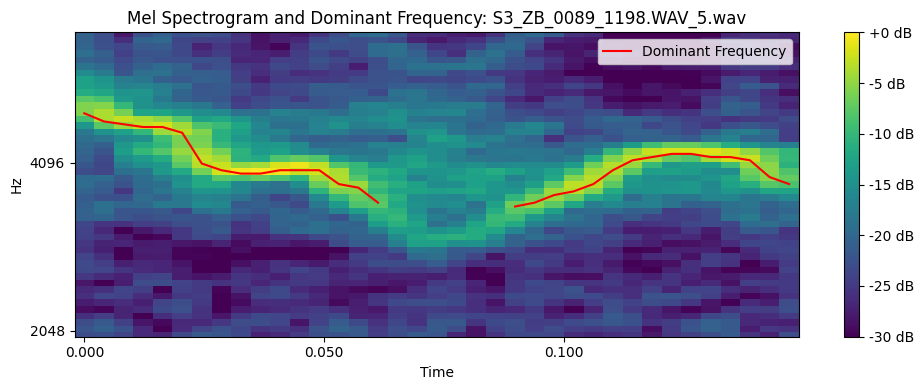

400
90
[5016.375, 5016.375, 4906.125, 4851.0, 5016.375, 4851.0, 3913.875, 3858.75, 3803.625, 3693.375, 3638.25, 3803.625, 3858.75, 3858.75, 3913.875, 3969.0, 3913.875, 3913.875, 3858.75, 3858.75, 3858.75, 3693.375, 3693.375, 3693.375, 3638.25, 3693.375, 3638.25, 3583.125, nan]


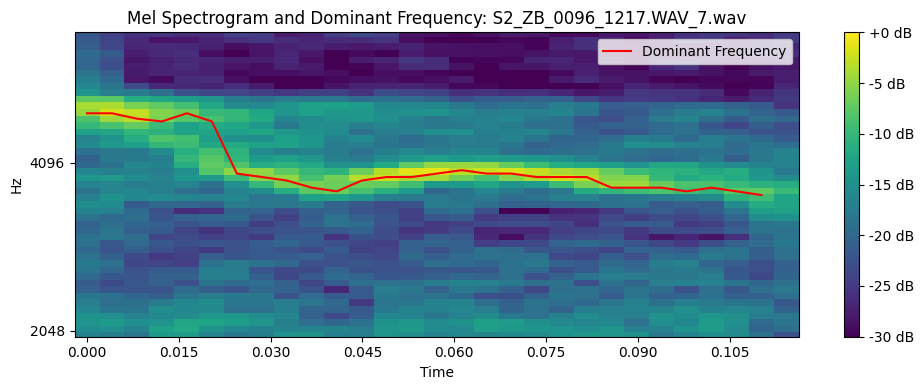

400
90
[nan, nan, nan, 3142.125, 3142.125, 3197.25, 3362.625, 3583.125, 3693.375, 3803.625, 3858.75, 3913.875, 4134.375, 4134.375, 4189.5, 4189.5, 4354.875, 4685.625, 4740.75, 4740.75, 3913.875, 3748.5, 3693.375, 3638.25, 3638.25, 3693.375, 3693.375, 3693.375, 3913.875, 4299.75, 4410.0, 4575.375, 4795.875, 4795.875, 4685.625, 4630.5, 4630.5, 4575.375, 4575.375, 4520.25, 4465.125, 4465.125, 4410.0, 4410.0, 4410.0, 4354.875, 4354.875, 4299.75, 4244.625, 4134.375, nan, nan, nan, nan]


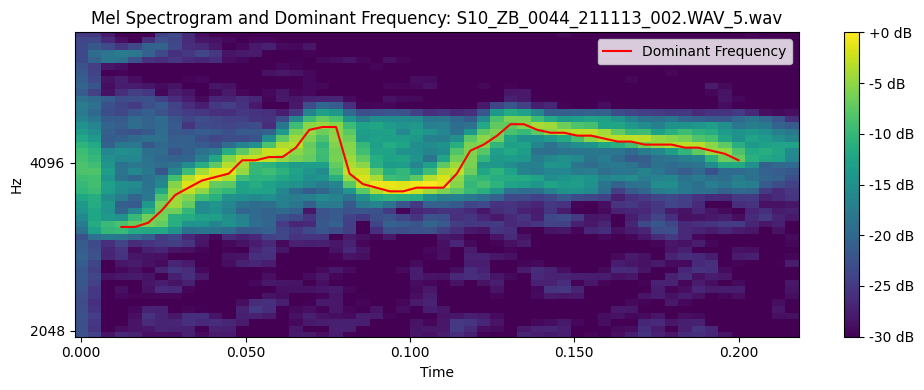

400
90
[nan, 5236.875, 5622.75, 5292.0, 5016.375, 5016.375, 5016.375, 5016.375, 5016.375, 5016.375, 5181.75, 5126.625, 5126.625, 5016.375, 5016.375, 5016.375, 5016.375, 5016.375, 5071.5]


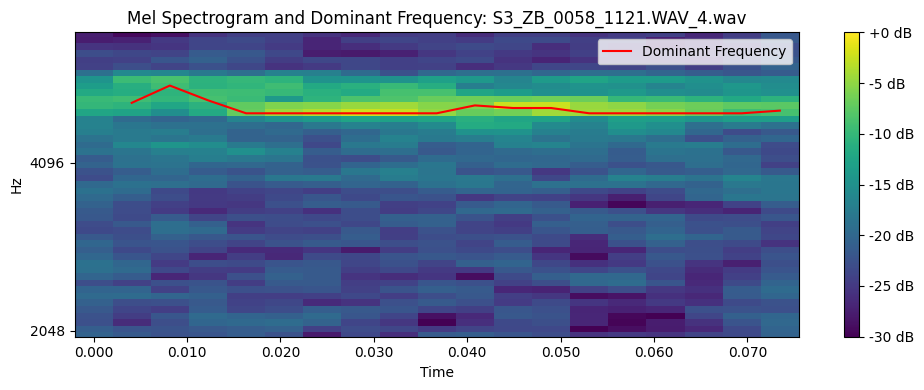

400
90
[nan, 4740.75, 4740.75, 4685.625, 4685.625, 4630.5, 4630.5, 4630.5, 4685.625, 4740.75, 4795.875, 4961.25, 5016.375, 5071.5, 5126.625, 5126.625, 5071.5, 4795.875, 4685.625, 4630.5, 4134.375, 4079.25, 3858.75, 3858.75, 3748.5, 3803.625, 3858.75, 3913.875, 4244.625, 4299.75, 4354.875, 4410.0, 4410.0, 4465.125, 4465.125, 4465.125, 4465.125, 4465.125, 4465.125, nan]


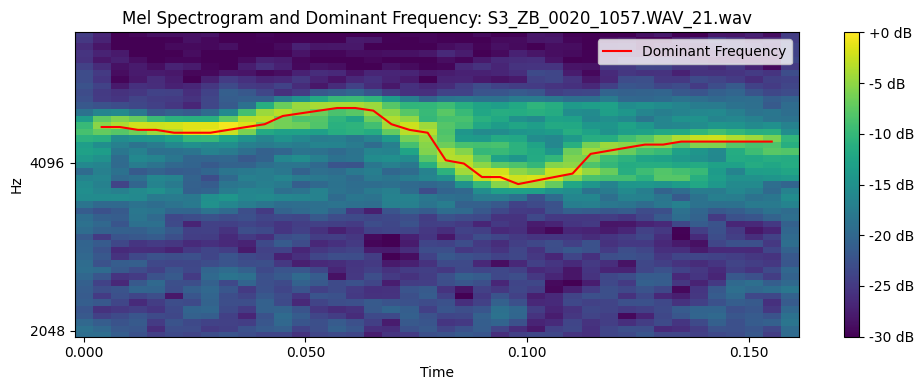

400
90
[nan, 3969.0, 3969.0, 3913.875, 3858.75, 3803.625, 3748.5, 3528.0, 3528.0, 3528.0, 3803.625, 3858.75, 4189.5, 4134.375, 4134.375, 4024.125, 3913.875, 3858.75, 3362.625, 3362.625, 3362.625, 3362.625, 3307.5, 3307.5, 3252.375, 3197.25, 3197.25, 3197.25, 3197.25, 3197.25, 3252.375, 3307.5, 3307.5, 3362.625, 3417.75, 3472.875, 3528.0, 3528.0, 3528.0, 3472.875, 3417.75, nan, nan]


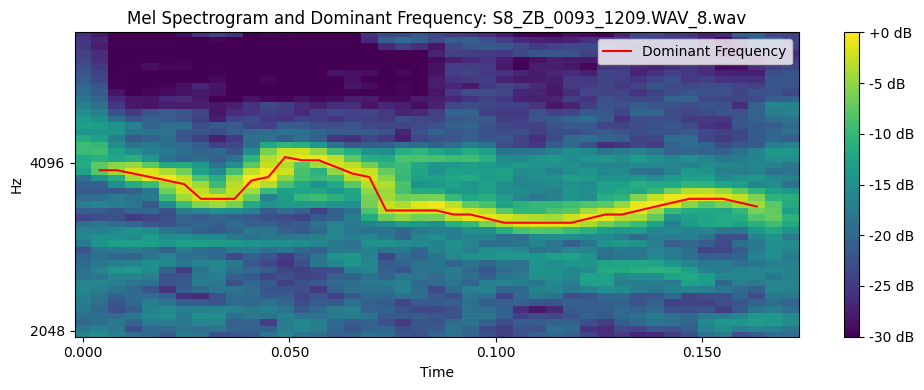

400
90
[nan, nan, 3858.75, 3803.625, 3803.625, 3803.625, 3803.625, 3748.5, 3693.375, 3693.375, 3362.625, 3142.125, 3197.25, 3197.25, 3638.25, 3693.375, 3803.625, 4024.125, 4189.5, 4189.5, 4189.5, 4189.5, 3913.875, 4244.625, 4244.625, 4299.75, 4354.875, 4024.125, 3858.75, 3748.5, 3528.0, 3362.625, 3307.5, 3087.0, 3031.875, 3031.875, 3031.875, 3031.875, 3087.0, 3197.25, 3307.5, 3362.625, 3362.625, 3362.625, 3362.625, 3362.625]


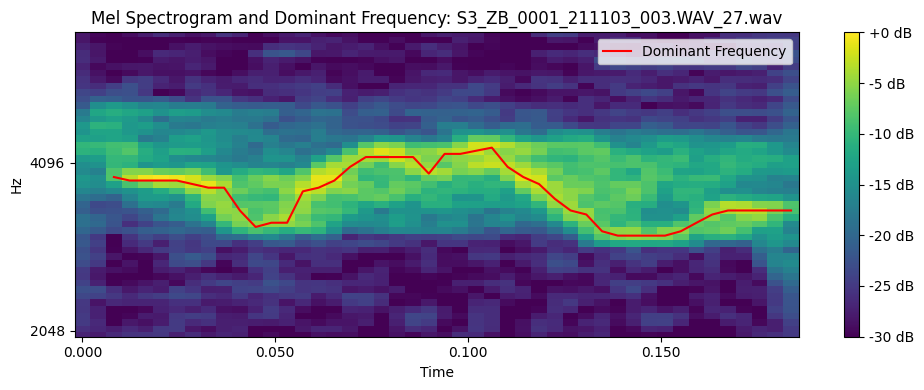

400
90
[5347.125, 5016.375, 4410.0, 4244.625, 3528.0, 3913.875, 4024.125, 4079.25, 4079.25, 4024.125, 3858.75, 3858.75, 3748.5, 3693.375, 3638.25, 3583.125, 3583.125, 3197.25, 3142.125]


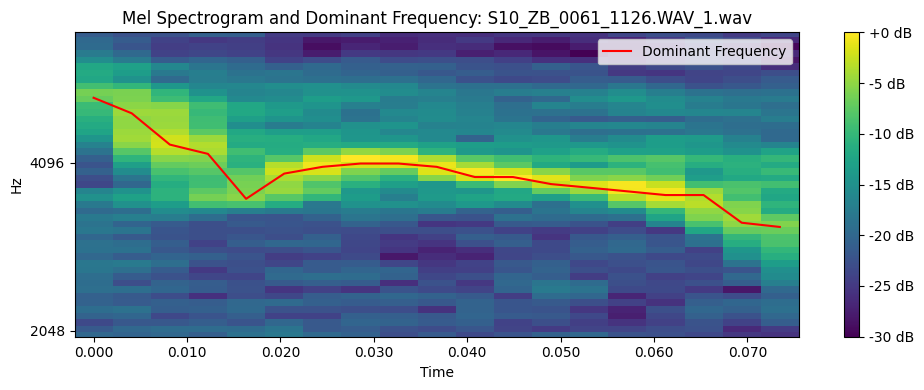

400
90
[4685.625, 4685.625, 4685.625, 4630.5, 4630.5, 4630.5, 4630.5, 4575.375, 4575.375, 4630.5, 4630.5, 4520.25, 4520.25, 4520.25, 4575.375, 4575.375, 4575.375, 4630.5, 4520.25, 4575.375, 4354.875, 4299.75, 4575.375, 4575.375, 4299.75, 4299.75, 4134.375, 4134.375, 4079.25]


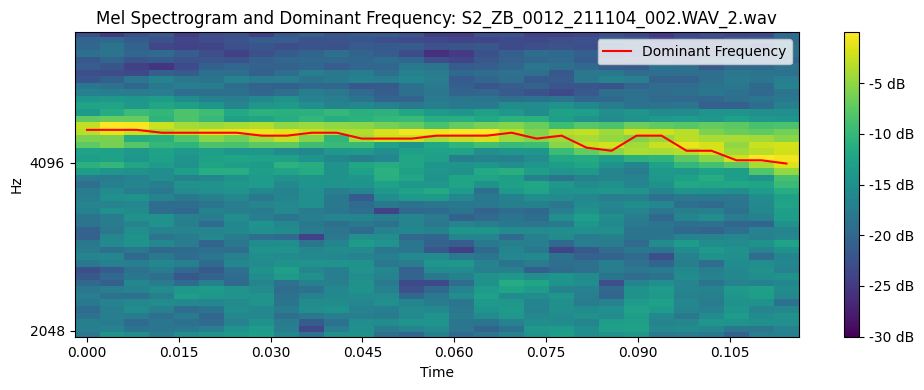

400
90
[4079.25, 4024.125, 3913.875, 3858.75, 3528.0, 3803.625, 3803.625, 4465.125, 4520.25, 4134.375, 3969.0, 3913.875, 3969.0, 4189.5, 4906.125, 5071.5, 5181.75, 5236.875, 5236.875, 5181.75, 5126.625, 4685.625, 4575.375, 4520.25, 4410.0, 4189.5, 3693.375, 3417.75, 3362.625, 3362.625, 3583.125, 3638.25, 3638.25, 3583.125, 3583.125, 3417.75, nan, nan]


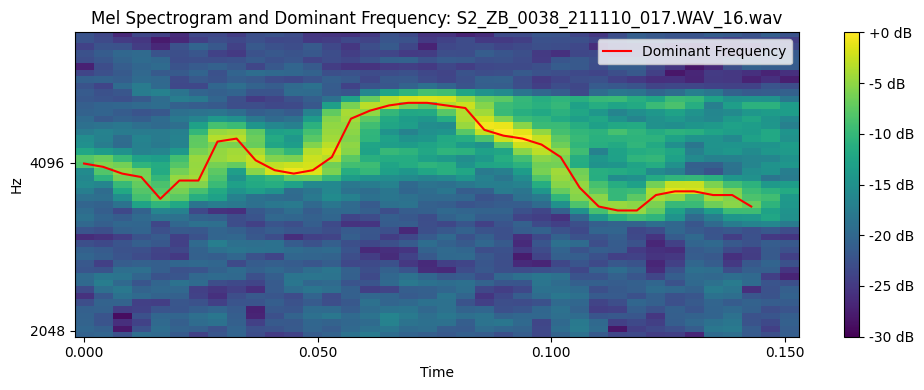

400
90
[nan, 5347.125, 5347.125, 5016.375, 4851.0, 4520.25, 4520.25, 4520.25, 4575.375, 4630.5, 4906.125, 5071.5, 5071.5, 4851.0, 4685.625, 4575.375, 4354.875, 4189.5, 4134.375, 4024.125, 3969.0, 3858.75, 3803.625, 3748.5, 3748.5, 3748.5, 3693.375, 3693.375, 3693.375, 3693.375, 3693.375, 3693.375, 3693.375, 3693.375, 3693.375, 3693.375, 3803.625, 3858.75, 3913.875, 3969.0, 4465.125, 4465.125, 4299.75, 4244.625, 4134.375, nan, nan, nan, nan, nan]


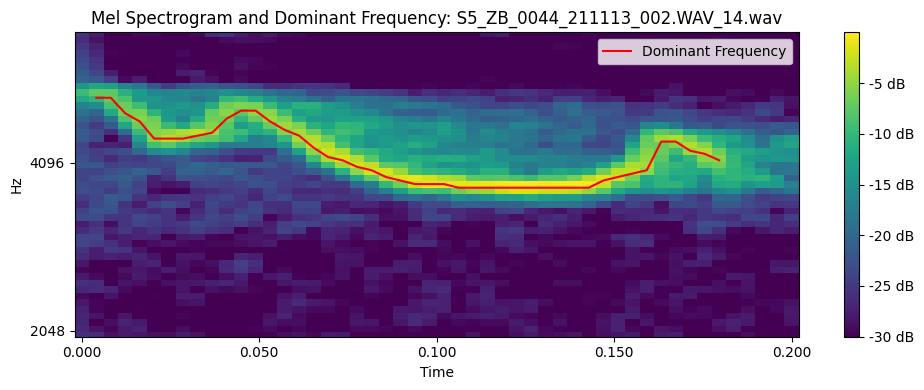

400
90
[5898.375, 5016.375, 4906.125, 4906.125, 4906.125, 4851.0, 4740.75, 4410.0, 4410.0, 4465.125, 4520.25, 4575.375, 4465.125, 3969.0, 3969.0, 3969.0, 4024.125, 4079.25, 3969.0, 3858.75, 3803.625, 3748.5, 3803.625, 3803.625, 3913.875, 3969.0, 3969.0, 3969.0, 3913.875, 3858.75, nan, nan]


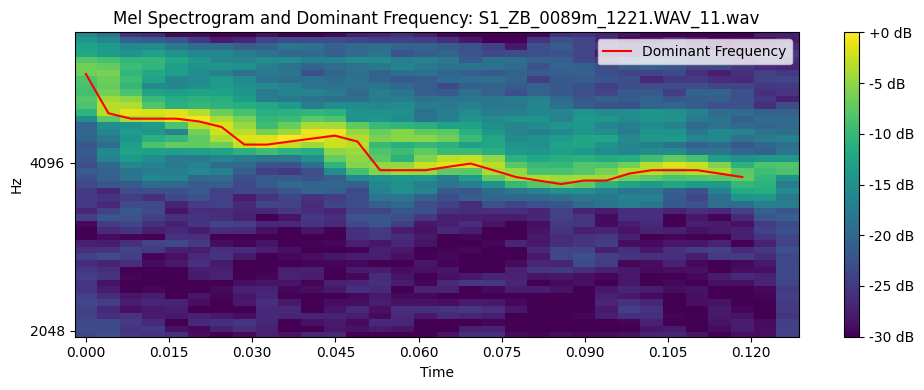

400
90
[nan, 5236.875, 5567.625, 5512.5, 4961.25, 4961.25, 4685.625, 4685.625, 4079.25, 4685.625, 4906.125, 4906.125, 4851.0, 4685.625, 4685.625, 4685.625, 4575.375, 4520.25, 4465.125, 4410.0, 4299.75, 4244.625, 4134.375, 4079.25, 4079.25, 4079.25, 4079.25, 3913.875, nan, 3197.25, 3252.375, 3362.625, 3748.5, 3748.5, 3693.375, 3583.125, 3583.125, nan]


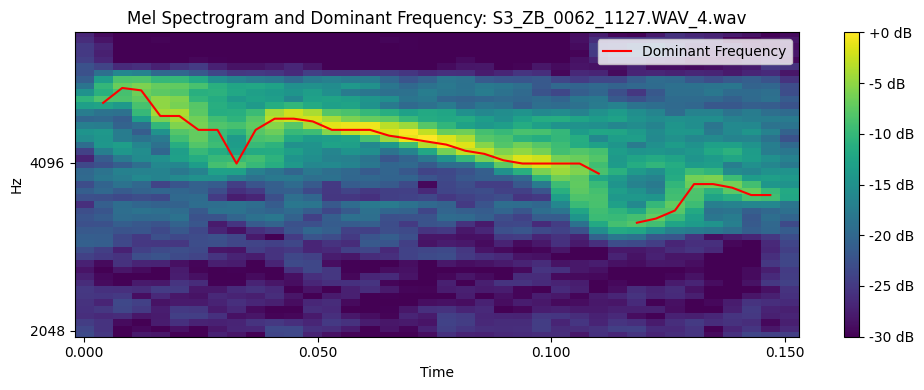

400
90
[nan, nan, nan, nan, 4795.875, 4520.25, 4299.75, 4244.625, 4189.5, 4189.5, 4134.375, 4024.125, 4024.125, 3748.5, 3693.375, 3638.25, 3528.0, 3472.875, 3417.75, 3417.75, 3417.75, 3417.75, 3417.75, 3417.75, 3417.75, 3638.25, 3638.25, 3913.875, 3638.25, 3638.25, 3472.875, 3417.75, 3307.5, 3307.5, 3307.5, 3307.5, 3307.5, 3307.5, 3307.5, 3252.375, 3252.375, 3252.375, nan]


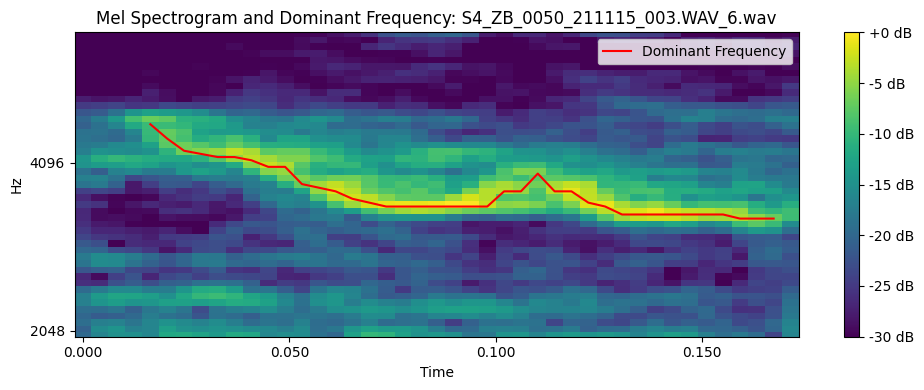

400
90
[4740.75, 4740.75, 4961.25, 5016.375, 5126.625, 5181.75, nan, nan, 5843.25, nan, nan, 5016.375, 5236.875, 5843.25, 5843.25, 5677.875, 5677.875, 5292.0, 5236.875, 5016.375, 4906.125, 4795.875, 4740.75, 4740.75, 4740.75, 4795.875, 4795.875, 4795.875, 4740.75, 4740.75, 4795.875]


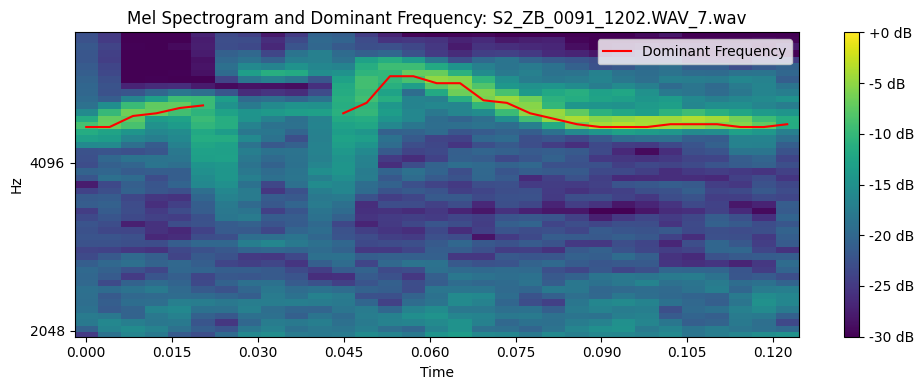

400
90
[nan, nan, 4740.75, 4685.625, 4189.5, 4079.25, 4024.125, 3913.875, 3858.75, 3803.625, 3748.5, 3693.375, 3638.25, 3583.125, 3583.125, 3583.125, 3583.125, 3583.125, 3583.125, 3528.0, 3528.0, 3472.875, 3417.75, 3417.75, 3362.625, 3307.5, 3307.5, 3197.25, 3142.125, 3197.25, 3583.125, 3638.25, 4134.375, 4851.0, 4354.875, 4134.375, 3969.0, 3858.75, 3858.75, 3803.625, 3803.625, 3858.75, 4024.125, 4024.125, 3858.75]


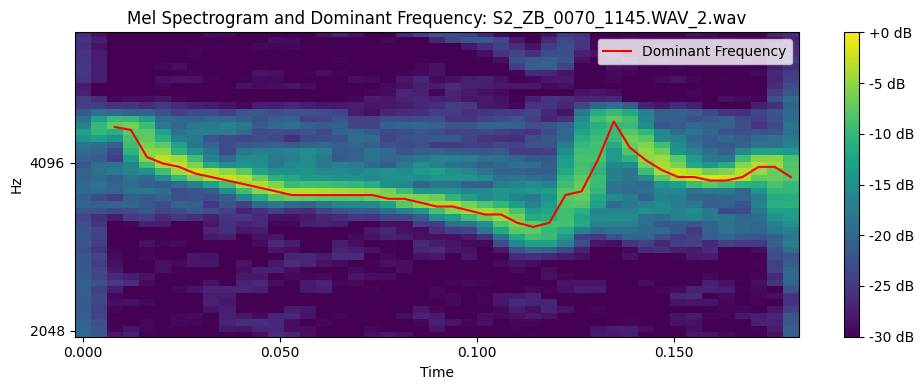

400
90
[4244.625, 4244.625, 4244.625, 4299.75, 4244.625, 4244.625, 4134.375, 3969.0, 3913.875, 3803.625, 3803.625, 3803.625, 3528.0, 3528.0, 3528.0, 3803.625, 3913.875, 4630.5, 4685.625, 4685.625, 4465.125, 4244.625, 4244.625, 4134.375, 3913.875, 3913.875, 3803.625, 3803.625, 3803.625, 4465.125, 2921.625, 2921.625, 3087.0, 3307.5, 3307.5, 3307.5, 3803.625, 3803.625, 3803.625, 3472.875, 3307.5, 3362.625, 3362.625, 3417.75, 3748.5, 3472.875, 3528.0, nan]


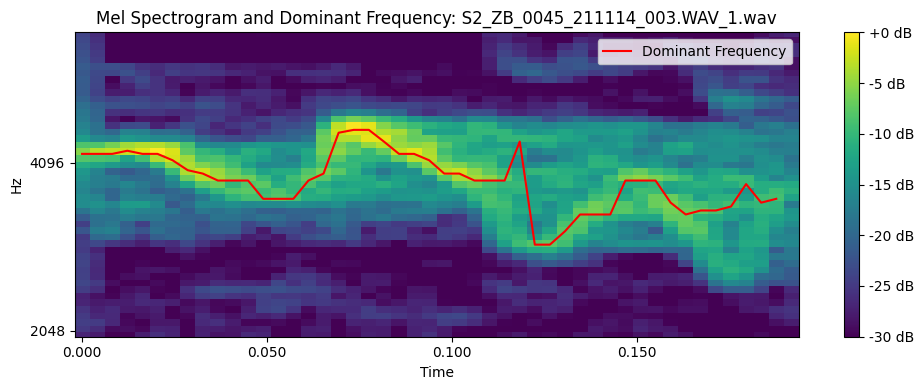

400
90
[nan, 5788.125, 5733.0, 5402.25, 5181.75, 5126.625, 5071.5, 5016.375, 4961.25, 4961.25, 4795.875, 4630.5, 4520.25, 4410.0, 4134.375, 4079.25, 3969.0, 3693.375, 3693.375, 3748.5, 3417.75, 3693.375, 3693.375, 3307.5, 3472.875, 3528.0, 3528.0, 3472.875, 3472.875, 3362.625, 3307.5, nan, nan, nan, nan, nan, nan]


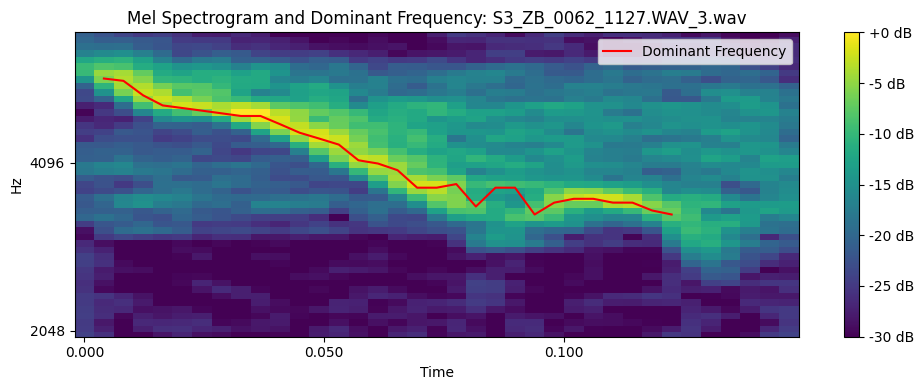

400
90
[nan, 4410.0, 4465.125, 4465.125, 4410.0, 4410.0, 4465.125, 4685.625, 4685.625, 4520.25, 4465.125, 3858.75, 3748.5, 4685.625, 4354.875, 4354.875]


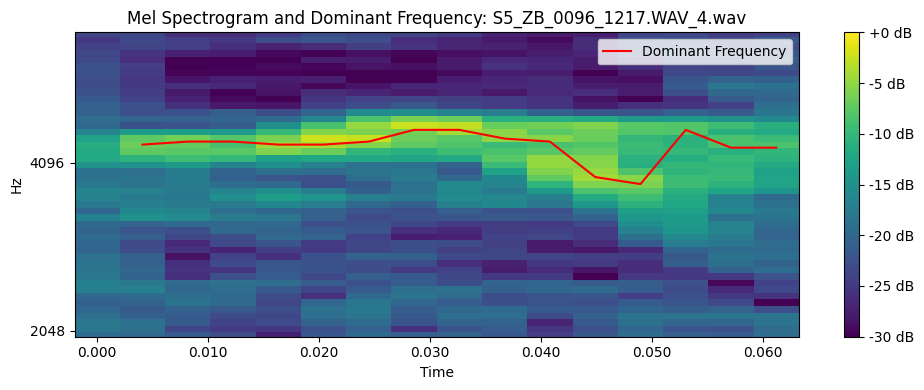

In [91]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import os
import random
import librosa.display

def track_and_plot_dominant_frequencies(directory, window_length_sec=0.01, freq_min=2200, freq_max=7000, db_min=-30):
    # List all WAV files in the directory
    all_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.wav')]
    # Randomly select 50 files
    selected_files = random.sample(all_files, min(50, len(all_files)))

    for audio_path in selected_files:
        y, sr = librosa.load(audio_path)
        window_size = 400#int(window_length_sec * sr)
        print(window_size)
        hop_length = 90#window_size // 2
        print(hop_length)

        # Compute the Short-Time Fourier Transform (STFT) and Mel Spectrogram
        S = librosa.stft(y, n_fft=window_size, hop_length=hop_length)
        S_magnitude, _ = librosa.magphase(S)
        mel_spec = librosa.feature.melspectrogram(S=S_magnitude, sr=sr)
        mel_spec_dB = librosa.power_to_db(mel_spec, ref=np.max)
        mel_spec_dB_filtered = np.where(mel_spec_dB > db_min, mel_spec_dB, db_min)

        freqs = librosa.fft_frequencies(sr=sr, n_fft=window_size)

        dominant_frequencies = []
        dominant_amplitudes = []

        for i in range(S_magnitude.shape[1]):
            if freq_min is not None and freq_max is not None:
                valid_indices = (freqs >= freq_min) & (freqs <= freq_max)
                magnitude_slice = S_magnitude[valid_indices, i]
                freqs_slice = freqs[valid_indices]
            else:
                magnitude_slice = S_magnitude[:, i]
                freqs_slice = freqs

            dominant_index = np.argmax(magnitude_slice)
            dominant_frequency = freqs_slice[dominant_index]
            dominant_amplitude = magnitude_slice[dominant_index]

            dominant_frequencies.append(dominant_frequency)
            dominant_amplitudes.append(dominant_amplitude)

        # Filtering low amplitudes
        mean_amplitude = np.mean(dominant_amplitudes)
        threshold_amplitude = 0.3 * mean_amplitude
        dominant_frequencies = [freq if amp >= threshold_amplitude else np.nan for freq, amp in zip(dominant_frequencies, dominant_amplitudes)]
        print(dominant_frequencies)
        
        times = librosa.frames_to_time(np.arange(len(dominant_frequencies)), sr=sr, hop_length=hop_length)

        # Plotting
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(mel_spec_dB_filtered, x_axis='time', y_axis='mel', sr=sr, hop_length=hop_length, cmap = 'viridis')
        plt.colorbar(format='%+2.0f dB')
        plt.plot(times, dominant_frequencies, color='red', label='Dominant Frequency')
        plt.title(f'Mel Spectrogram and Dominant Frequency: {os.path.basename(audio_path)}')
        plt.ylim(2000,7000)
        plt.legend()
        plt.tight_layout()
        plt.show()
        
directory = '/Users/quentinbacquele/Desktop/Internship/Berkeley/Reunion Gray white-eye/01_Analysed 2/segments'
track_and_plot_dominant_frequencies(directory)
